# ***AdsorpSim*** 
## The ultimate tool for carbon capture !

#### Julian Barth, Marin Desgeans, Lucas Eichenberger


   

<div style="text-align: center;">
<img src="./images/Asterix.jpg" alt="UI" width="600"/>
</div>

Welcome to our documentation notebook for the package ***AdsorpSim***, an open source tool designed to generate breakthrough curves for direct air capture (DAC) of CO₂. It plays a critical role in tuning carbon capture machines and identifying the optimal adsorption time, accelerating the journey toward efficient climate solutions. It's an open source alternative to expensive softwares!

You may find below the table of contents to get a glimpse on the global structure of our project.

***Table of Contents***

1. Introduction
2. Presentation of the functions
3. Presentation and extraction of data
4. Presentation of the UI and the different app's tools 
5. Conclusion ?
6. Acknowledgments


### 1. Introduction
The fight against climate change is urgent and relentless. To limit global warming to **1.5°C**, the world must remove over **10 billion tons of CO₂ every year by 2050**. That means not only cutting current emissions, but also dealing with past emissions that remain in the atmosphere. Technologies that actively remove CO₂ from the air are no longer optional: they’re essential.

One of the most promising of these technologies is Direct Air Capture (DAC), which captures CO₂ directly from the air, where it exists at extremely low concentrations, **around 400 parts per million**. That makes the challenge particularly difficult: extracting a trace gas from a massive volume of air requires both smart materials and smart system design.

At EPFL, the Carbon Team, a student-led group, is tackling this challenge head-on. One of its prototype systems, named Asterix (see picture above), captures CO₂ using **solid adsorbents**: materials that selectively trap CO₂ as air flows through them. These systems rely on a packed adsorbent bed, typically modeled as a cylindrical column filled with porous particles. As air is pushed through the column, CO₂ is gradually removed until the adsorbent becomes saturated.

<figure style="text-align: center;">
  <img src="./images/FlowSheet.png" alt="Flow Diagram" style="max-width: 600px; width: 100%; height: auto;" />
  <figcaption> Schematic of the Carbon team's full process (we will only focus on Asterix).</figcaption>
</figure>

**Designing such systems is complex**. Performance depends on many variables: the type of adsorbent, the bed height, particle size, flow rate, inlet concentration, and more. Building and testing every possible configuration in the lab would be time-consuming and expensive.

**That’s where our project comes in.**

We developed an interactive, open-source simulator that lets the Carbon Team experiment with different system designs and adsorbent materials, all in a matter of seconds. With this tool, users can:

- Simulate CO₂ adsorption over time using different materials
- Modify system parameters like bed dimensions, particle diameter, and inlet flow rate
- Visualize performance using a breakthrough curve
- Estimate the total amount of CO₂ captured over a specified period

The breakthrough curve is a key output of the simulator. It shows how the outlet CO₂ concentration changes over time. At the start, the adsorbent captures nearly all the CO₂, so the outlet concentration is near zero. As the bed becomes saturated, CO₂ begins to break through — hence the name. This curve is fundamental for assessing the efficiency and capacity of the system.

One of the simulator’s biggest strengths is that it’s **open-source and easily customizable**. Unlike commercial alternatives such as Aspen Adsorption, which costs up to $20,000 per year and offers limited flexibility, our tool is free to use, modify, and share. That makes it ideal for student teams, researchers, and early-stage innovators who need speed, flexibility, and transparency.

In short, this simulator is more than a visualization tool, it’s a strategic R&D tool for the EPFL Carbon Team. It allows them to test ideas virtually, accelerate design iterations, and make data-driven decisions, all without relying on expensive software or slow experimental cycles.

---


### 2. Presentation of the functions

#### Workflow

Let's first understand the experiment workflow.


1) The user first **defines an adsorbent** by specifying its Langmuir parameters (e.g., maximum adsorption capacity, equilibrium constant, adsorption rate, and density).

2) The user **initializes a bed** by providing its geometry, flow conditions, the adsorbent object and optionally humidity.

3) The user calls the **`simulate()` method** to run the adsorption process over the specified time.

4) The simulation outputs concentration profiles at the bed outlet, which the user can **plot and analyze** (e.g., breakthrough curves for CO₂ and H₂O).


<figure style="text-align: center;">
  <img src="./images/schema.png" alt="Flow Diagram" style="max-width: 300px; width: 100%; height: auto;" />
  <figcaption> Simplified process flow scheme</figcaption>
</figure>


#### Langmuir Isotherm Explanation

The **Langmuir Isotherm** describes how molecules adsorb onto a solid surface forming a monolayer. It assumes:

- A fixed number of adsorption sites,  
- Each site holds at most one molecule,  
- No interaction between adsorbed molecules.

The equilibrium adsorbed amount $q_{eq}$ relates to the gas-phase concentration $C$ as:

$$
q_{eq} = \frac{q_{\max} K C}{1 + K C}
$$

where:

- $q_{eq}$ is the equilibrium adsorbed amount (mol/kg),  
- $q_{\max}$ is the maximum adsorption capacity (monolayer coverage),  
- $K$ the Langmuir equilibrium constant (related to affinity),  
- $C$ is the gas-phase concentration (e.g., mol/m³).

#### Code Explanation

- **Adsorbent_Langmuir class:**  
  Defines the adsorbent properties using the Langmuir model for CO₂ and optionally H₂O adsorption.

- **Bed class:**  
  Models the packed bed reactor as a series of segments with plug flow.  
  It converts the PDE describing concentration changes into ODEs using spatial discretization and solves them over time.


#### Key Steps in the Bed Class

- `_initial_conditions()`: Sets initial concentrations and adsorbed amounts in each segment.

- `_ode_system(t, y)`: Defines the system of ODEs representing mass balances and adsorption kinetics along the bed.

- `simulate()`: Solves the ODE system over time and returns the outlet gas concentrations.


#### Discretization Details

The bed length is divided into multiple segments (`num_segments`). Concentration gradients are approximated by **upwind finite differences**, assuming plug flow:

$$
\frac{\partial C}{\partial z} \approx \frac{C_i - C_{i-1}}{\Delta z}
$$

where

$$
\Delta z = \frac{\text{bed length}}{\text{number of segments}}
$$

This spatial discretization transforms PDEs into ODEs solvable by standard methods.

#### Mathematical Model Summary

For each gas component (CO₂ or H₂O), the mass balance in segment i is:

$$
\frac{dC_i}{dt} = -v \frac{C_i - C_{i-1}}{\Delta z} - \rho_b \frac{dq_i}{dt}
$$

where:

- $C_i$: concentration in segment $i$ ($mol/m^3$),  
- $v$: superficial gas velocity ($m/s$),
- $\Delta z$: segment length ($m$),  
- $\rho_b$: bulk density of adsorbent ($kg/m^3$),  
- $q_i$: adsorbed amount in segment $i$, evolving by Langmuir kinetics ($mol/m^3$):  

$$\frac{dq_i}{dt} = k_{\text{ads}} (q_{eq,i} - q_i)$$


with $q_{eq,i}$ given by the Langmuir isotherm and $k_{ads}$ the adosprtion rate constant (1/s)

#### How to Use

Enough theory: let's get to coding!
Let's import the right libraries, the needed classes and our different functions.

In [69]:
%matplotlib inline
import sys
from pathlib import Path
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
import os

notebook_path = Path().resolve() 
src_path = notebook_path.parent / "src" 
if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

from adsorpsim.core import (
    Bed,
    Adsorbent_Langmuir,
    download_data,
    get_percentage_point,
    add_adsorbent_to_list,
    plot_the_graph,
    get_adsorbed_quantity_CO2,
    get_adsorbed_quantity_H2O,
    fit_adsorption_parameters_from_csv
)

Let's define an adsorbent. We'll use the example of activated carbon. 

In [70]:
carbon = Adsorbent_Langmuir(
    name="Activated Carbon",
    q_max_CO2=4.5, 
    K_CO2=0.2,
    k_ads_CO2=15,
    density=500,
    q_max_H2O=0.15,
    K_H2O=0.05,
    k_ads_H2O=0.005
    )

Now that the adsorbent objetc was created, we can define a that models the reactor and will allow us to draw the breakthrough curve

In [71]:
Reactor = Bed(
    length=1.0,
    diameter=0.01,
    flow_rate=0.01,
    num_segments=100,
    total_time=3000,
    adsorbent=carbon,
    humidity_percentage=0
)

With use of the "simulate()" function, we can simulate the adsorption process recovering the different points of the breakthrough curve as arrays.

In [72]:
t, outlet_CO2, outlet_H2O = Reactor.simulate()

We can now choose wich percentage of saturated adsorbent is wanted

In [73]:
wanted_percentage=90
pc_point_x, pc_point_y = get_percentage_point(wanted_percentage,t,outlet_CO2)

We now have the needed variables to draw the curve !

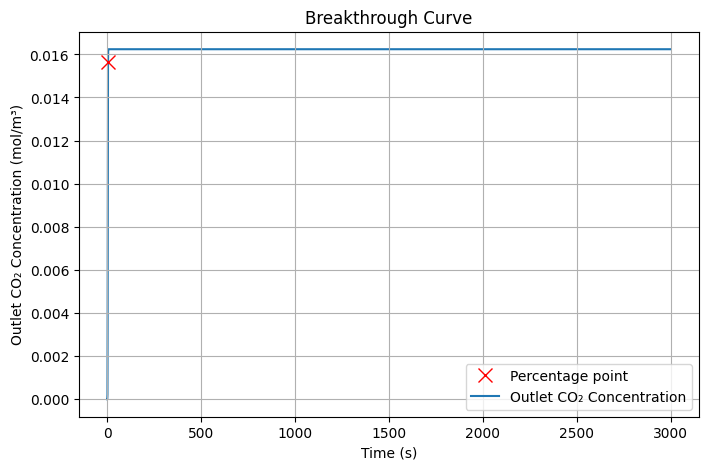

In [74]:
fig=plot_the_graph(t,outlet_CO2,outlet_H2O,pc_point_x,pc_point_y)

### 2. Presentation of the functions

In this chapter, the different used functions and their usage will be detailed.

First, a class for the adsorbent and a class for the bed were created

In [75]:
class Adsorbent_Langmuir:
    def __init__(self, name, q_max, K0, Ea, k_ads, density):
        self.name = name
        self.q_max = q_max  # mol/kg
        self.K0 = K0        # pre-exponential factor, 1/(mol/m³)
        self.Ea = Ea        # activation energy in J/mol
        self.k_ads = k_ads  # 1/s
        self.density = density  # kg/m³
        self.R = 8.314      # J/mol·K

    def __repr__(self):
        return f"{self.name} (q_max={self.q_max}, K0={self.K0}, Ea={self.Ea}, k_ads={self.k_ads}, density={self.density})"

class bed description

In [76]:
class Bed: #now we can also initialize a bed with a PREDEFINED adsorbant
    def __init__(self, length, diameter, flow_rate, num_segments, total_time, adsorbent, T):
        self.length = length  # meters
        self.diameter = diameter  # meters
        self.flow_rate = flow_rate  # m³/s
        self.num_segments = num_segments  # discretization segments
        self.total_time = total_time
        self.adsorbent = adsorbent
        self.T = T #Kelvin

        self.area = np.pi * (self.diameter / 2) ** 2
        self.velocity = self.flow_rate / self.area  # m/s
        self.dz = self.length / self.num_segments

        # Inlet conditions, these are specifif to what we do at the CT 
        self.R = 8.314  # J/mol·K
        self.P = 101325  # Pa
        self.initial_molefrac = 400e-6
        self.initial_conc = self.initial_molefrac * self.P / (self.R * self.T)  # mol/m³

    def _initial_conditions(self): #we create a matrix which takes in the concentration of CO2 at any segemnt, in the gas and solid phase. 
        C_init = np.zeros(self.num_segments)
        C_init[0] = self.initial_conc  # Only inlet has CO2 at t=0
        q_init = np.zeros(self.num_segments)
        return np.concatenate([C_init, q_init])

    def _ode_system(self, t, y): 
        # Split the initial conditions back in 2 matrices 
        C = y[:self.num_segments]
        q = y[self.num_segments:]

        dCdt = np.zeros_like(C)
        dqdt = np.zeros_like(q)

        # Inlet boundary condition
        C_in = self.initial_conc
        C_upstream = np.concatenate([[C_in], C[:-1]])

        # Advection and adsorption
        dCdz = (C - C_upstream) / self.dz
        K=self.adsorbent.K0 * np.exp(-self.adsorbent.Ea / (self.adsorbent.R * self.T))
        q_eq_vals=(self.adsorbent.q_max * K * C) / (1 + K * C)
        dqdt = self.adsorbent.k_ads * (q_eq_vals - q)
        dCdt = -self.velocity * dCdz - self.adsorbent.density * dqdt

        return np.concatenate([dCdt, dqdt])

    def simulate(self, plot=False):
        t_span = (0, self.total_time)
        t_eval = np.linspace(*t_span, self.total_time)
        # enbales the integration of the momentum equation 
        sol = solve_ivp(
            self._ode_system, #ode system with as many equations as segments and "t"s
            t_span,
            self._initial_conditions(),
            t_eval=t_eval,
            method='BDF',
            vectorized=False,
            rtol=1e-6,
            atol=1e-9
        )

        C_sol = sol.y[:self.num_segments, :]
        outlet_conc = C_sol[-1, :]

        if plot:
            plt.figure(figsize=(8,5))
            plt.plot(sol.t, outlet_conc, label="Outlet CO₂ Concentration")
            plt.xlabel('Time (s)')
            plt.ylabel('Outlet CO₂ Concentration (mol/m³)')
            plt.title('Breakthrough Curve')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        return sol.t, outlet_conc

The first function was simply created to dowload the data. The form and the utility of the dataset will be presented later in the notebook

In [77]:
#the data were not cached as it does not allow the apparition of new asorbent imputted from the app 
def download_data(csv_file):
    "Download the adsorbent database"
    df = pd.read_csv(csv_file, sep= ";")
    return df

The "get_percentage_point" was used to draw the red marker on the graph. The user may choose a certain percentage of saturated adsorbent depending on their needs on the experiment time. This percentage as well as the two lists used to draw the graph are given to the function. The function then calculates and returns the two coordinates of the desired point. These coordinates will be further used to calculate the adsorbed quantity of CO₂ at this experiment time. 

In [78]:
def get_percentage_point(percentage:int, t, outlet_conc):
    """
    This function first identifies the outlet CO2 concentration at the desired percentage

    it then finds the index of the nearest value contained in the outlet concentration array 
    (in other words the nearest value taken by the function)

    Once the index is found, we can define and return the point's coordinates
    """
    if np.max(outlet_conc)<0.1624:
        almost_pc_point_y=(percentage/100*np.max(outlet_conc))
    else:
        almost_pc_point_y=(percentage/100*0.01624)

    idx_proche = np.abs(outlet_conc - almost_pc_point_y).argmin()

    pc_point_y = outlet_conc[idx_proche]
    index = np.where(outlet_conc == pc_point_y)[0][0]
    pc_point_x = t[index]
    return pc_point_x, pc_point_y

The "plot_the_graph" function was used to plot the graph. mathplotlib was used to achieve a light, easy to read graphic. The previously calculated lists of points are needed to draw the curve and the coordinates for the end point are needed to draw the red cross.  

In [79]:
def plot_the_graph(t,outlet_conc,pc_point_x,pc_point_y):
    """
    This function plots the breakthrough graph
    """
    #the plot is created
    fig, ax = plt.subplots(figsize=(8, 5))
    #the point at wich the desired percentage of adsorbent is saturated in CO2 is plotted
    ax.plot(pc_point_x, pc_point_y, "rx", markersize=10, label="Percentage point",zorder=3)
    #the breakthrough curve is plotted
    ax.plot(t, outlet_conc, label="Outlet CO₂ Concentration",zorder=1)
    #the template of the graph is defined
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Outlet CO₂ Concentration (mol/m³)')
    ax.set_title('Breakthrough Curve')
    ax.legend()
    ax.grid(True)
    return fig

The "Add_adsorbent_to_list" function was used to implement the possibility for the user to add an adsorbent to the dataset directly from the app. the name of the adsorbent and its physical properties are given to the function which will create a dataframe with them and add this new row to the dataset.

In [80]:
def add_adsorbent_to_list(CSV_PATH, name, q_max, K0, Ea, k_ads, density):
    """
    This function reads a given .csv file 
    and adds a row containing the different needed physical property of an adsorbent
    The physical properties and the name has to be given to the function
    The .csv file is then saved
    """
    #creation of a dataframe with the new line (new adsorbent)
    new_row = {
    "name": name,
    "q_max": q_max,
    "K0": K0,
    "Ea": Ea,
    "k_ads": k_ads,
    "density": density
    }
    #the file is read and the new adsorbent is added
    df = pd.read_csv(CSV_PATH, sep=";")
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    #the file is saved 
    df.to_csv(CSV_PATH, sep=";", index=False)

The "get_adsorbed_quantity" function was used to calculate the quantity of adsorbed CO₂ between the start of the experiment and the time at the red cross (which variates depending on how many percent of saturated adsorbent is needed). The adsorbed quantity is the difference between the concentration of CO₂ is the air wich is constant at ~0.01624 mol/m³ and the measured outlet concentration. Thus, the list constituting the outlet concentration values of the curve is cleaved at the red cross location. The concentration of CO₂ in the air is then substracted to this "sub-list" to retrieve the adsorbed CO₂ concentration per second. The quantity is calculated by multiplying this variable to the flowrate and the time of the experiment here showd as "pc_point_x".

In [81]:
def get_adsorbed_quantity(t,outlet_conc, pc_point_x, pc_point_y, flow_rate):
    """
    This function will calculate the quantity of adsorbed CO₂ in mol 

    An array containing the concentration of adsorbed CO₂ per m³ is created with all the concentrations from the start to the red cross, (which represents the desired percentage of saturated adsorbent in CO₂)
    
    The component of the array are then summed and multiplied by the acquisition time and the flowrate to retrieve a quantity of matter in moles.
    """
    adsorbed_array=np.array([])
    index = np.where(outlet_conc == pc_point_y)[0][0]
    for elem in outlet_conc[:round(index)+1]:
        if elem<0.01624:
            adsorbed=0.01624-elem
            adsorbed_array=np.append(adsorbed_array, adsorbed)
    return sum(adsorbed_array)*flow_rate*pc_point_x

### 3.Presentation and extraction of the data

The data for this app is presented in the csv file: Dataset PPC.csv. This file contains a list of adsorbent and their physical properties needed to draw the breakthrough curve. The file is organised as follows: each row represents one adsorbent.

|name     | q_max | K0   | Ea   | k_ads | density |
|--------------------|------|---------|---------|-------|--------|
| Activated Carbon   | 2.0  | 20000.0 | 25000.0 | 0.01  | 1000.0 |
| Activated Carbon2  | 1.0  | 10000.0 | 12500.0 | 0.02  | 500.0  |
| Activated Carbon3  | 1.0  | 10000.0 | 12500.0 | 0.002 | 500.0  |


The loading of the data is essential for the proper functionning of the app. Additionnaly, a dictionnary indexed by the adsorbent's name is created with an entry for each adsorbent. This dictionnary will be used to display the good physical constants for the graph when one or another adsorbent is chosen on the list.

Additionally, a list of the adsorbents' names is created. This list will be used to propose to the user the usage of the different adsorbents.

In [82]:
#the data are loaded: are the data consist of different adsorbents with their physical properties
current_file = Path(os.path.abspath(''))
csv_file = current_file.parent / "data" / "Dataset PPC.csv"
#the data are downloaded
df = download_data(csv_file)
#a dictionnary indexed by the adsorbents names is created, there is an entry for each adsorbent present in the dataset
adsorbants = {}
for _, row in df.iterrows():
    ads = Adsorbent_Langmuir(
        name=row["name"],
        q_max=row["q_max"],
        K0=row["K0"],
        Ea=row["Ea"],
        k_ads=row["k_ads"],
        density=row["density"]
    )
    adsorbants[row["name"]] = ads
#a list of all the registered adsorbents is created
list_adsorbents = list(adsorbants.keys())

KeyError: 'q_max'

### 4. Presentation of the UI and the different app's tools 

In this chapter, the different elements in the user's interface and their utility will be described as follows: 

<ol type="a">
    <li> The bed parameters modifications </li>
    <li> The adsorbent parameters modifications</li>
    <li> The plotting of the graph</li>
    <li> The adsorbed quantity of carbon dioxide</li>
    <li> The possibility to add an adsorbent to the data</li> 
</ol>

#### a. The bed parameters modifications

<div style="text-align: center;">
<img src="Bed.png" alt="UI" width="400"/>
</div>

The user is let to choose the bed parameters. This parameters are defined by different sliders with maximum and minimum values. The temperature is defined with a "number_input" widget. 

The bed length and diameter changes the volume of the installation whiyh changes the total quantity of adsorbent as we assume that the bed is full of material. 

The flowrates influence the speed at which the air is let trhough the cartridge. For optimal results, the flowrate should not exceed the speed of the adsorption reaction. 

The number of segments determines the discretisation of the bed. A higher number of esegemnts will allow more precise results but implies more complex calculations.

The total time determines the time of the experiment. 

T is the temperature of the experiment. Colder temperatures will favorize adsorption while hotter temperature will accelerate the desorption.

And finally, the "percentage_CO2" is defined between 1 and 100% and represents the desired percentage of adsorbent saturated in CO₂. This value is used to calculate the coordinates of the red cross. 

In [ ]:
#Title
st.title('Adsorption Breakthrough Curve Simulator')
st.caption("Practical Proramming In Chemistry - Project")
st.markdown("Julian Barth, Marin Deasgeans, Lucas Eichenbegrer")

#the bed parameters are chosen from the user's interface with defaults settings
st.header('Simulation Parameters')
col1, col2 = st.columns([1, 1])
with col1:
    length = st.slider('Bed Length (m)', 0.1, 5.0, 1.0)
    diameter = st.slider('Bed Diameter (m)', 0.01, 0.5, 0.1)
    flow_rate = st.slider('Flow Rate (m³/s)', 0.001, 0.1, 0.01)
with col2:
    num_segments = st.slider('Number of Segments', 10, 500, 100)
    total_time = st.slider('Total Simulation Time (s)', 100, 10000, 3000)
    T = st.number_input("Temperature (K)", 298.15, step = 10.0)
#a percentage of wanted saturated adsorbent is defined
#this will be further used to calculate the quantity of fixed CO2 depending on the capacity's fraction
percentage_CO2 = st.slider("Percentage of adsorbent saturated in CO₂", 1, 100, 90)

#### b. The adsorbent parameters modifications

<div style="text-align: center;">
<img src="List.png" alt="UI" width="400"/>
</div>

Five physical properties are mandatory for each adsorbent:

-q_max represents...

-K0 ...

-Ea is the activation energy of the adsorbent, ...

-k_ads ...

-density is the density of the adsorbent is directly proportionate to the quantity of adsorbent in one cartridge.

The user is let to choose one adsorbent among the different species present in the dataset. Each adsorbent is linked to its properties: choosing one will automatically insert the good values for each physical property. 

The user also have the choice to choose "Manual Modifications". In this case, the user can modify the different parameters from the user's interface and curve will adapt with the implemented values.

In [ ]:
#the user is invited to choose an adsorbent among the previously prepared list
#the "Manual Manipulations" setting is added to propose the possibility to change parameters manually
st.sidebar.header("List of registered adsorbant")
choix = st.sidebar.selectbox(
    "Choose an adsorbent",
    ["Manual Modifications"]+list_adsorbents,
    index=1
)
#code for the manual modifications setting:
if choix=="Manual Modifications":
    #the adsorbent parameters are chosen from the user's interface with defaults settings
    st.sidebar.header('Adsorbent Properties')
    q_max = st.sidebar.number_input('q_max (mol/kg)', value=1.0, step=1.0)
    K0 = st.sidebar.number_input('K (1/(mol/m³))', value=10000.0,step=10000.0)
    Ea = st.sidebar.number_input("Ea (J)", value=10000.0,step=10000.0)
    k_ads = st.sidebar.number_input('k_ads (1/s)', value=0.01,format="%.4f",step=0.0100)
    density = st.sidebar.number_input('Density (kg/m³)', value=100.0,step=100.0)
    # Create adsorbent
    adsorbent = Adsorbent_Langmuir(
    name="Manual adsorbant",
    q_max=q_max,
    K0=K0,
    Ea=Ea,
    k_ads=k_ads,
    density=density
    )
    #create bed
    bed = Bed(
    length=length,
    diameter=diameter,
    flow_rate=flow_rate,
    num_segments=num_segments,
    total_time=total_time,
    adsorbent=adsorbent,
    T=T
)
#code for the adsorbents registered in the dataset
else:
    #adsorbent parameters
    st.sidebar.header('Adsorbent Properties')
    q_max_fixed = st.sidebar.number_input('q_max (mol/kg)', value=adsorbants[choix].q_max , disabled=True, step=1.0)
    K0_fixed = st.sidebar.number_input('K (1/(mol/m³))', value=adsorbants[choix].K0 , disabled=True,step=10000.0)
    Ea_fixed = st.sidebar.number_input(("Ea (J)"), value=adsorbants[choix].Ea , disabled=True,step=10000.0)
    k_ads_fixed = st.sidebar.number_input('k_ads (1/s)', value=adsorbants[choix].k_ads , disabled=True,format="%.4f",step=0.01)
    density_fixed = st.sidebar.number_input('Density (kg/m³)', value=adsorbants[choix].density , disabled=True,step=100.0)
    # Select adsorbent in the previously created dictionnary
    adsorbent = adsorbants[choix]
    #create bed
    bed = Bed(
    length=length,
    diameter=diameter,
    flow_rate=flow_rate,
    num_segments=num_segments,
    total_time=total_time,
    adsorbent=adsorbent,
    T=T
)

#### c. The plotting of the graph

<div style="text-align: center;">
<img src="Graph.png" alt="UI" width="400"/>
</div>

Different previously presented functions are called to draw the breakthrough curve. The red cross is here observed at the point were 90% of the adsorbent is saturated in CO₂.

In [ ]:
#different values needed for plotting the graph are calculated using functions that are shown in "core.py"
t, outlet_conc = bed.simulate(plot=False)
pc_point_x, pc_point_y = get_percentage_point(percentage_CO2,t,outlet_conc)
#a toggle to show or not the graph is created
on_off = st.toggle("Show the graph", value=True)
if on_off:
    st.pyplot(plot_the_graph(t,outlet_conc,pc_point_x,pc_point_y))

#### d. The adsorbed quantity of carbon dioxide

<div style="text-align: center;">
<img src="Quantities.png" alt="UI" width="400"/>
</div>

The adsorbed quantity of CO₂ is calculated in moles using the previously presented function. The quantity in kilogramms is easily calculated using CO₂ molar mass. The needed time, which corresponds to the x coordinate of the red cross is also displayed. 

All these values are impacted by both the bed and the adsorbent parameters. Changing on of them will directly recalculate the different quantities, exhibiting the efficiency of the chosen system. 

In [ ]:
st.write("If the experiment is stopped where the red cross is, the following CO₂ quantities would be absorbed")
col11, col22 = st.columns([1, 1])
#in the left part, the quantity of matter of captured CO2 and the acquisition time are shown
with col11:
    #in this tile, the quantity of matter of adsorbed CO2 is calculated and shown
    tile1=st.container(height = 120)
    adsorbed_quantity=get_adsorbed_quantity(t,outlet_conc,pc_point_x,pc_point_y,flow_rate)
    tile1.metric("Quantity of adsorbed CO₂ in one cycle", f"{round(adsorbed_quantity, 2)} [mol]")
    #in this tile, the time of acquisition is shown. It was deducted from the x coordinate of the red cross
    tile3=st.container(height=120)
    tile3.metric("Acquisition time", f"{round(pc_point_x/60)} [min]")
#in the right part, the mass of captured CO2 is shown
with col22:
    tile2=st.container(height = 120)
    tile2.metric("Mass of adsorbed CO₂ in one cycle", f"{round(adsorbed_quantity*0.044009, 2)} [kg]")

#### e. The possibility to add an adsorbent to the data

<div style="text-align: center;">
<img src="Add.png" alt="UI" width="400"/>
</div>

Finally, the user is let to add an adsorbent to the list directly from the app. In order to do this, he must fill the differents widgets, giving the name and the physical properties of the adsorbent. If he forgets one an error message will show up, otherwise, the adsorbent will successfully be added to the dataset and will be available for usage after a quick refresh of the page.

In [ ]:
#Bonus sidebar: the user has the possibility to implement an adsorbents in the dataset directly from the app
st.sidebar.header("Add an adsorbent to the list")
#the constants of the adsorbent has to be listed
with st.sidebar.form("Ajout adsorbent"):
    add_ads_name = st.text_input("name")
    add_ads_q_max = st.number_input("q_max (mol/kg)")
    add_ads_K0 = st.number_input("K0 (1/(mol/m³))")
    add_ads_Ea = st.number_input("Ea (J)")
    add_ads_k_ads = st.number_input("k_ads (1/s)")
    add_ads_density = st.number_input("density (kg/m³)")
    #the use of a form ensures the app will not rerun after each input but only after the button is pressed
    submitted = st.form_submit_button("Add the adsorbent to the list")
#when the button is pressed, the programm will either notify a missing information or add the adsorbent in the dataset
if submitted:
    if add_ads_name=="" or add_ads_q_max==0 or add_ads_K0==0 or add_ads_Ea==0 or add_ads_k_ads==0 or add_ads_density==0:
        st.sidebar.error("there is missing parameter(s)")
    else:
        #add the adsorbent to the .csv file
        add_adsorbent_to_list(csv_file,add_ads_name,add_ads_q_max,add_ads_K0,add_ads_Ea,k_ads,add_ads_density)
        st.sidebar.success("The adsorbent was added to the list, please refresh the page (Ctrl+R)")

### 5. Conclusion



### 6. Acknowledgments

We thank the **EPFL Carbon Team**, especially the Chemistry subteam Panoramix, for providing experimental data acquired in **Professor Wendy Queen’s** lab. Their contributions were essential for validating and grounding our simulator in real-world performance.